In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

In [2]:
planets_train = pd.read_csv("C:/Users/user/.jupyter/주피터 파일/data/planets_train.csv")
planets_train.drop(['Unnamed: 0'], axis = 1, inplace = True)

planets_test = pd.read_csv("C:/Users/user/.jupyter/주피터 파일/data/planets_test.csv")
planets_test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
train_x = planets_train.iloc[:, 1:6]
train_y = planets_train.iloc[:, 0]

test_x = planets_test.iloc[:, 1:6]
test_y = planets_test.iloc[:, 0]

In [4]:
train_y = train_y.where((train_y == 'Radial Velocity') | (train_y == 'Transit'), 'Others')
test_y = test_y.where((test_y == 'Radial Velocity') | (test_y == 'Transit'), 'Others')

In [5]:
train_x[['orbital_period', 'distance', 'mass']] = np.log(train_x[['orbital_period', 'distance', 'mass']])
test_x[['orbital_period', 'distance', 'mass']] = np.log(test_x[['orbital_period', 'distance', 'mass']])

In [6]:
train_x = train_x.interpolate()
test_x = test_x.interpolate()

In [7]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

train_x = RobustScaler().fit_transform(train_x)
test_x = RobustScaler().fit_transform(test_x)

In [8]:
from imblearn.over_sampling import SMOTE

x_train, y_train = SMOTE(random_state=0).fit_resample(train_x, train_y)
x_test, y_test = SMOTE(random_state=0).fit_resample(test_x, test_y)

In [9]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [10]:
y_train_oh = pd.get_dummies(y_train).values
y_test_oh = pd.get_dummies(y_test).values

In [11]:
x_train = torch.from_numpy(x_train).float()
y_train_oh = torch.from_numpy(y_train_oh).float()

x_test = torch.from_numpy(x_test).float()
y_test_oh = torch.from_numpy(y_test_oh).float()

In [17]:
train_dataset = TensorDataset(x_train, y_train_oh)
test_dataset = TensorDataset(x_test, y_test_oh)

In [18]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [19]:
class Net(nn.Module):
        def __init__(self,n_input = 5, n_output=3):
            super(Net,self).__init__()
            self.n_in = n_input
            self.n_out = n_output
            self.fc1 = nn.Linear(self.n_in,64)
            self.fc2 = nn.Linear(64,256)
            self.fc3 = nn.Linear(256,self.n_out)
            self.relu = nn.ReLU()
            #self.dropout = nn.Dropout(0.5)
            self.softmax = nn.Softmax(dim=1)
        
        def forward(self,x):
            out = self.relu(self.fc1(x))
            out = self.relu(self.fc2(out))
            out = self.dropout(out)
            out = self.softmax(self.fc3(out))
            
            return out
        

In [28]:
model = PytorchNet(5,3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.001)
Epochs = 100

In [29]:
model.train()
loss_list = []
acc_list = []
for epoch in range(Epochs):
    running_loss = 0.0
    running_acc = 0
    
    print("Epoch {}/{}".format(epoch+1, Epochs))
    for i, data in enumerate(train_loader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)

        _,preds = torch.max(outputs,1)
        _,lab = torch.max(labels,1)        
        
        
        loss = criterion(outputs, lab)
        loss.backward()
        optimizer.step()
        

        running_loss += loss.item()
        running_acc += torch.sum(preds==lab.data)
    
    epoch_loss = running_loss/len(train_dataset)
    epoch_acc = running_acc.double() / len(train_dataset)
    loss_list.append(epoch_loss)
    acc_list.append(epoch_acc)
    
    print("Loss : {}, ACC : {}".format(epoch_loss,epoch_acc))

Epoch 1/200
Loss : 0.033148665639959704, ACC : 0.5093724531377343
Epoch 2/200
Loss : 0.029471630377796675, ACC : 0.6405867970660146
Epoch 3/200
Loss : 0.02727115834351954, ACC : 0.7049714751426243
Epoch 4/200
Loss : 0.026248267635448054, ACC : 0.7408312958435208
Epoch 5/200
Loss : 0.025714555598898643, ACC : 0.7603911980440098
Epoch 6/200
Loss : 0.02543444442088369, ACC : 0.7571312143439283
Epoch 7/200
Loss : 0.0251165871806716, ACC : 0.7644661776691116
Epoch 8/200
Loss : 0.024870855835461482, ACC : 0.771801140994295
Epoch 9/200
Loss : 0.024706756475988013, ACC : 0.784841075794621
Epoch 10/200
Loss : 0.02463785030050985, ACC : 0.78239608801956
Epoch 11/200
Loss : 0.024494515605932732, ACC : 0.7889160554197229
Epoch 12/200
Loss : 0.024281995220697305, ACC : 0.8092909535452323
Epoch 13/200
Loss : 0.024341743314956005, ACC : 0.7954360228198859
Epoch 14/200
Loss : 0.02408148985911698, ACC : 0.8092909535452323
Epoch 15/200
Loss : 0.023896379643761248, ACC : 0.8060309698451508
Epoch 16/200
L

Loss : 0.0210569748668624, ACC : 0.8883455582722086
Epoch 125/200
Loss : 0.021130997617747983, ACC : 0.8883455582722086
Epoch 126/200
Loss : 0.021023186319906146, ACC : 0.8932355338223309
Epoch 127/200
Loss : 0.02099051971987388, ACC : 0.8964955175224124
Epoch 128/200
Loss : 0.021081229633884695, ACC : 0.8891605541972291
Epoch 129/200
Loss : 0.021097897123105173, ACC : 0.8891605541972291
Epoch 130/200
Loss : 0.02108121875251515, ACC : 0.8907905460472698
Epoch 131/200
Loss : 0.02095030115791327, ACC : 0.895680521597392
Epoch 132/200
Loss : 0.020982143785667887, ACC : 0.895680521597392
Epoch 133/200
Loss : 0.020956426251682696, ACC : 0.895680521597392
Epoch 134/200
Loss : 0.021170282082141854, ACC : 0.8842705786471068
Epoch 135/200
Loss : 0.021100773253670144, ACC : 0.8867155664221679
Epoch 136/200
Loss : 0.020955527227101717, ACC : 0.8948655256723717
Epoch 137/200
Loss : 0.020963609898683008, ACC : 0.8973105134474327
Epoch 138/200
Loss : 0.02097185433348117, ACC : 0.8924205378973105
Epo

In [30]:
model.eval()
test_loss = 0.0
test_acc= 0
pred_list = []
label_list = []
for data in test_loader:
    inputs, labels = data
    outputs = model(inputs)
    _,preds = torch.max(outputs,1)
    _,lab = torch.max(labels,1)
    
    loss = criterion(outputs, lab)
    
    test_loss += loss.item()
    test_acc += torch.sum(preds==lab.data)

    pred_list.extend([p for p in preds.tolist()])
    label_list.extend(lab.tolist())
    
test_loss = test_loss/len(test_dataset)
test_acc = test_acc.float()/len(test_dataset)
print("Loss : {}, ACC : {}".format(test_loss, test_acc))

Loss : 0.024798665923633795, ACC : 0.7793103456497192


[Text(0, 0.5, 'Radial Velocity'),
 Text(0, 1.5, 'Transit'),
 Text(0, 2.5, 'Others')]

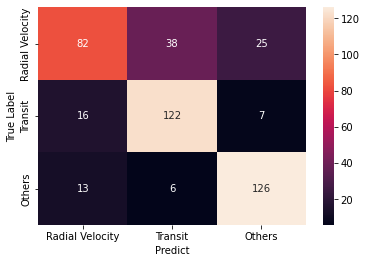

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

classes = ['Radial Velocity','Transit', 'Others']

cm = confusion_matrix(label_list,pred_list)
c = sns.heatmap(cm,annot=True,fmt='g')
c.set(ylabel = "True Label", xlabel = "Predict")
c.set_xticklabels(classes)
c.set_yticklabels(classes)